In [1]:
import numpy as np
import pandas as pd
from pylab import *
import scipy.signal as signal
import scipy as sci
import math as ma

In [2]:
dataset1 = pd.read_json("./../Data/Band/HEB2/merged_file_acc.json")
dataset2 = pd.read_json("./../Data/Band/HEB2/merged_file_acc_phone.json")

#dataset1

In [3]:
dataset1 = dataset1.sort_values(by='Timestamp') 
dataset1['Timestamp'] = dataset1['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset1 = dataset1[[5,6,7,8]]

dataset2 = dataset2.sort_values(by='Timestamp') 
dataset2['Timestamp'] = dataset2['Timestamp'].apply(lambda x: x.replace(microsecond=0))
dataset2 = dataset2[[5,6,7,8]]

dataset_f = dataset1.merge(dataset2,how='left', left_on='Timestamp', right_on='Timestamp')

dataset_f = dataset_f.fillna(method='bfill')
dataset_f = dataset_f.fillna(method='pad')

dataset_f

,Timestamp,X_x,Y_x,Z_x,X_y,Y_y,Z_y
0,2016-10-15 00:27:10,-0.190430,-0.976074,-0.174805,0.815835,-1.902457,0.801988
1,2016-10-15 00:27:11,-0.235840,-0.986572,-0.089600,-0.464292,-0.094157,-0.261606
2,2016-10-15 00:27:12,-0.280762,-0.950928,0.053711,0.202535,0.275523,0.164486
3,2016-10-15 00:27:13,-0.331055,-0.927979,0.110107,-0.565748,0.902990,-2.584273
4,2016-10-15 00:27:14,-0.426514,-0.861328,0.164307,0.688736,-0.404320,0.516306
5,2016-10-15 00:27:15,-0.398193,-0.913330,0.135742,0.323110,-0.256722,-0.032831
6,2016-10-15 00:27:16,-0.348633,-0.963867,-0.022949,0.133217,-1.154256,0.307168
7,2016-10-15 00:27:17,-0.270020,-0.969727,0.160645,0.463465,0.352670,-1.639250
8,2016-10-16 00:21:20,-0.590088,-0.307861,0.674805,0.463465,0.352670,-1.639250
9,2016-10-16 00:21:21,-0.605225,0.364502,0.487793,0.463465,0.352670,-1.639250


In [4]:
dataset = dataset_f.as_matrix();
dataset[:,4:7]

array([[0.8158346414566041, -1.902457475662231, 0.801987648010253],
       [-0.46429216861724804, -0.09415721893310501, -0.261606216430664],
       [0.202534556388854, 0.27552318572998, 0.16448593139648401],
       ..., 
       [0.078319072723388, -0.022202074527740003, 0.020268440246582],
       [0.38395449519157404, 0.5748522281646721, 0.21779918670654203],
       [0.15119114518165502, 0.34069812297821, 0.035518646240234]], dtype=object)

In [5]:
from sklearn import preprocessing
dataset[:,4:7] = preprocessing.normalize(dataset[:,4:7], norm='l2',axis=0)

/home/shailesh/anaconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype object was converted to float64 by the normalize function.
  warnings.warn(msg, DataConversionWarning)


In [6]:
dataset[:,4:7]

array([[0.009381246040250767, -0.029820593726533968, 0.013499401038680645],
       [-0.005338874873691772, -0.0014758932633945232,
        -0.004403468355867085],
       [0.0023289358021676364, 0.004318764066478845, 0.0027686979452252887],
       ..., 
       [0.0009005875131149078, -0.00034801253265726663,
        0.00034116710400214004],
       [0.004415075561416979, 0.00901067959110326, 0.003666089589465229],
       [0.001738540213889441, 0.005340366572550775, 0.0005978651306382905]], dtype=object)

In [7]:

#dataset

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

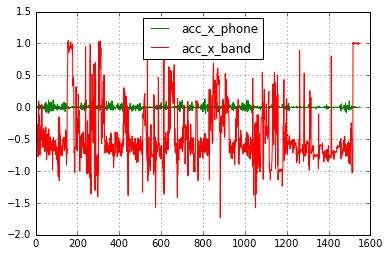

In [9]:
ax_l_band = dataset[:,1];
ay_l_band = dataset[:,2];
az_l_band = dataset[:,3];

ax_l_phone = dataset[:,4];
ay_l_phone = dataset[:,5];
az_l_phone = dataset[:,6];


lse = np.linspace(0, len(ax_l_band), len(ax_l_band));

plt.figure
plt.plot(lse, ax_l_phone, 'g',lse, ax_l_band, 'r');
plt.legend(('acc_x_phone','acc_x_band'), loc = 'best');
plt.grid(True);
plt.show();

In [10]:
d = np.mean(dataset[:,1:4]**2,axis = 1);
d2 = np.mean(dataset[:,4:7]**2,axis = 1);
rms_acc_band = []
rms_acc_phone = []
for i in range (0, len(d)):
    rms_acc_band.append(ma.sqrt(d[i]));

for i in range (0, len(d2)):
    rms_acc_phone.append(ma.sqrt(d2[i]));
    
d2

array([0.0003865031386246166, 1.669079313433115e-05,
       1.0580451114807282e-05, ..., 3.4952186150607545e-07,
       3.804181726151054e-05, 1.0633159972987198e-05], dtype=object)

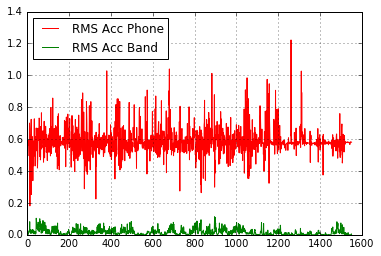

In [11]:
lse = np.linspace(0, len(rms_acc_band), len(rms_acc_band));

plt.figure
plt.plot(lse, rms_acc_band, 'r',lse, rms_acc_phone, 'g');
plt.legend(('RMS Acc Phone','RMS Acc Band'), loc = 'best');
plt.grid(True);
plt.show();